# Tugas 8 - Ensemble Learning Bagging

# Apa itu Ensemble Learning ?

Ensemble learning adalah cara sebuah algoritma mempelajari data dengan menggunakan kombinasi dari beberapa algoritma atau model untuk mendapatkan output dengan akurasi yang lebih tinggi jika dibandingkan dengan menggunakan satu algoritma atau model saja. Cara melakukan ensemble learning adalah dengan proses bagging, boosting, dan stacking.

Dalam proses metode ensemble, model-model individu ini biasa disebut anggota ensemble (ensemble member).

Tujuan melakukan Ensemble Learning adalah untuk mendapatkan model dengan akurasi yang lebih tinggi daripada jika hanya menggunakan satu algoritme/ model saja.

Ensemble Learning adalah cara yang ampuh untuk meningkatkan kinerja model kita.

Beberapa jenis Ensemble learning di antaranya :

- Bagging
- Boosting
- Stacking

# Bagging

Bagging, juga dikenal sebagai bootstrap aggregating, adalah proses dengan menggunakan beberapa model dari algoritma yang sama, dan melatih setiap model pada sampel berbeda dari dataset yang sama. Prediksi yang dibuat oleh setiap model kemudian digabungkan menggunakan statistik sederhana, seperti voting atau rata-rata.

# Boosting

Boosting adalah variasi bagging, di mana setiap model individu dibangun secara berurutan, mengulangi yang sebelumnya. Dalam prosesnya, setiap titik data yang salah diklasifikasikan oleh model sebelumnya ditekankan dalam model berikutnya. Hal ini dilakukan untuk meningkatkan akurasi model secara keseluruhan.



# Stacking

Stacking melibatkan pemasangan banyak jenis model yang berbeda pada data yang sama dan menggunakan model lain untuk mempelajari cara terbaik menggabungkan prediksi.

Pada materi kali ini, untuk implementasi kita hanya mencoba bagging saja

In [4]:
import warnings
warnings.filterwarnings("ignore")

In [5]:
import pandas as pd
import numpy as np
import sklearn
from scipy.io import arff

In [6]:
%cd /content/drive/MyDrive/KULIAH/SEMESTER 5/Data Mining/datamining

/content/drive/MyDrive/KULIAH/SEMESTER 5/Data Mining/datamining


In [7]:
%pwd

'/content/drive/MyDrive/KULIAH/SEMESTER 5/Data Mining/datamining'

In [8]:
# Input dataset
data = arff.loadarff('messidor_features.arff')
dataset = pd.DataFrame(data[0])
dataset.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,Class
0,1.0,1.0,22.0,22.0,22.0,19.0,18.0,14.0,49.895756,17.775994,5.270920,0.771761,0.018632,0.006864,0.003923,0.003923,0.486903,0.100025,1.0,b'0'
1,1.0,1.0,24.0,24.0,22.0,18.0,16.0,13.0,57.709936,23.799994,3.325423,0.234185,0.003903,0.003903,0.003903,0.003903,0.520908,0.144414,0.0,b'0'
2,1.0,1.0,62.0,60.0,59.0,54.0,47.0,33.0,55.831441,27.993933,12.687485,4.852282,1.393889,0.373252,0.041817,0.007744,0.530904,0.128548,0.0,b'1'
3,1.0,1.0,55.0,53.0,53.0,50.0,43.0,31.0,40.467228,18.445954,9.118901,3.079428,0.840261,0.272434,0.007653,0.001531,0.483284,0.114790,0.0,b'0'
4,1.0,1.0,44.0,44.0,44.0,41.0,39.0,27.0,18.026254,8.570709,0.410381,0.000000,0.000000,0.000000,0.000000,0.000000,0.475935,0.123572,0.0,b'1'


In [22]:
#Merubah nama masing -

col_names = []
for i in range(20):
    if i == 0:
        col_names.append('quality')
    if i == 1:
        col_names.append('prescreen')
    if i >= 2 and i <= 7:
        col_names.append('ma' + str(i))
    if i >= 8 and i <= 15:
        col_names.append('exudate' + str(i))
    if i == 16:
        col_names.append('euDist')
    if i == 17:
        col_names.append('diameter')
    if i == 18:
        col_names.append('amfm_class')
    if i == 19:
        col_names.append('label')

dataset.columns = col_names
dataset

,quality,prescreen,ma2,ma3,ma4,ma5,ma6,ma7,exudate8,exudate9,exudate10,exudate11,exudate12,exudate13,exudate14,exudate15,euDist,diameter,amfm_class,label
0,1.0,1.0,22.0,22.0,22.0,19.0,18.0,14.0,49.895756,17.775994,5.270920,0.771761,0.018632,0.006864,0.003923,0.003923,0.486903,0.100025,1.0,b'0'
1,1.0,1.0,24.0,24.0,22.0,18.0,16.0,13.0,57.709936,23.799994,3.325423,0.234185,0.003903,0.003903,0.003903,0.003903,0.520908,0.144414,0.0,b'0'
2,1.0,1.0,62.0,60.0,59.0,54.0,47.0,33.0,55.831441,27.993933,12.687485,4.852282,1.393889,0.373252,0.041817,0.007744,0.530904,0.128548,0.0,b'1'
3,1.0,1.0,55.0,53.0,53.0,50.0,43.0,31.0,40.467228,18.445954,9.118901,3.079428,0.840261,0.272434,0.007653,0.001531,0.483284,0.114790,0.0,b'0'
4,1.0,1.0,44.0,44.0,44.0,41.0,39.0,27.0,18.026254,8.570709,0.410381,0.000000,0.000000,0.000000,0.000000,0.000000,0.475935,0.123572,0.0,b'1'
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1146,1.0,1.0,34.0,34.0,34.0,33.0,31.0,24.0,6.071765,0.937472,0.031145,0.003115,0.000000,0.000000,0.000000,0.000000,0.537470,0.116795,0.0,b'0'
1147,1.0,1.0,49.0,49.0,49.0,49.0,45.0,37.0,63.197145,27.377668,8.067688,0.979548,0.001552,0.000000,0.000000,0.000000,0.516733,0.124190,0.0,b'0'
1148,1.0,0.0,49.0,48.0,48.0,45.0,43.0,33.0,30.461898,13.966980,1.763305,0.137858,0.011221,0.000000,0.000000,0.000000,0.560632,0.129843,0.0,b'0'
1149,1.0,1.0,39.0,36.0,29.0,23.0,13.0,7.0,40.525739,12.604947,4.740919,1.077570,0.563518,0.326860,0.239568,0.174584,0.485972,0.106690,1.0,b'1'


In [23]:
# Memisah data fitur dengan data label

X = dataset.drop(columns=['label'])
y = dataset['label'].values

In [12]:
# Proses encoder untuk merubah nama kelas menjadi numerik

from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(y)

ybaru=le.transform(y)
ybaru

array([0, 0, 1, ..., 0, 1, 0])

# Splitting

In [13]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(X,ybaru, test_size=0.3, random_state=50)

# Decision Tree tanpa bagging

In [14]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

# Cross Validation

Cross validation adalah suatu metode tambahan dari teknik data mining yang bertujuan untuk memperoleh hasil akurasi yang maksimal. Metode ini sering juga disebut dengan k-fold cross validation dimana percobaan sebanyak k kali untuk satu model dengan parameter yang sama

Secara umum, kita akan membandingkan n model dalam cross validation ini, dalam arti lain fungsi dari penggunaan metode cross validation adalah
- Untuk mengetahui performa dari suatu model algoritma dengan melakukan percobaan sebanyak k kali
- Untuk menningkatkan tingkat performansi dari model tersebut
- Untuk mengolah data set dengan kelas yang seimbang

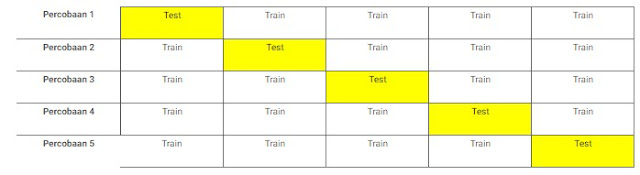

Percobaan diatas adalah contoh ilustrasi dari 5-fold cross validation yang artinya adalah melakukan percobaan sebanyak 5 kali  tahapan. 

- Percobaan 1, yaitu menjadikan bagian partisi pertama menjadi data testing dan partisi lainnya menjadi data training. 

- Percobaan 2, yaitu menjadikan bagian partisi kedua menjadi data testing dan partisi lainnya menjadi data training.
- Percobaan 3, yaitu menjadikan bagian partisi ketiga menjadi data testing dan partisi lainnya menjadi data training dan begitu seterusnya.

In [15]:
scores = cross_val_score(DecisionTreeClassifier(), X, ybaru, cv=5)
scores

array([0.62337662, 0.67826087, 0.60869565, 0.61304348, 0.5826087 ])

In [16]:
scores.mean()

0.6211970638057593

# Decision Tree dengan Bagging

In [17]:
from sklearn.ensemble import BaggingClassifier
bag_model = BaggingClassifier(
base_estimator=DecisionTreeClassifier(), 
n_estimators=100, 
max_samples=0.8, 
oob_score=True,
)

In [18]:
bag_model.fit(xtrain, ytrain)

BaggingClassifier(base_estimator=DecisionTreeClassifier(), max_samples=0.8,
                  n_estimators=100, oob_score=True)

In [19]:
bag_model.oob_score_

0.6782608695652174

In [20]:
bag_model.score(xtest, ytest)

0.6560693641618497

Terjadi peningkatan akurasi dimana dari 60% menjadi 68%